<a href="https://colab.research.google.com/github/LeonardoSalmento/1817-react-classes/blob/master/Prevendo_quais_projetos_ser%C3%A3o_finalizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [2]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
a_renomear = {
    "expected_hours" : "horas_esperadas",
    "unfinished" : "nao_finalizado",
    "price" : "preco"
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
troca = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

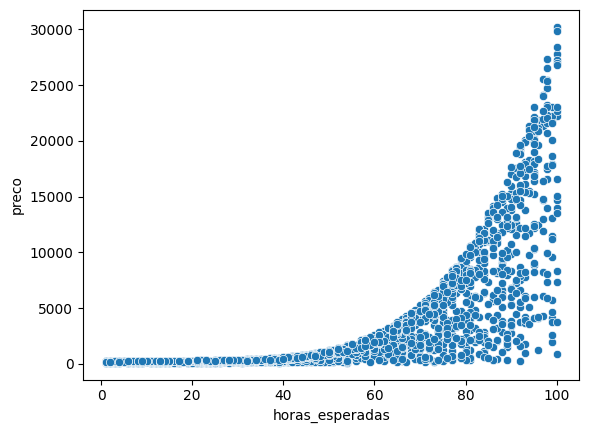

In [6]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

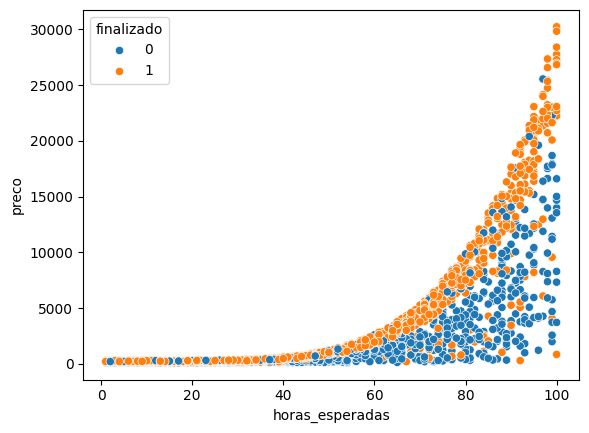

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

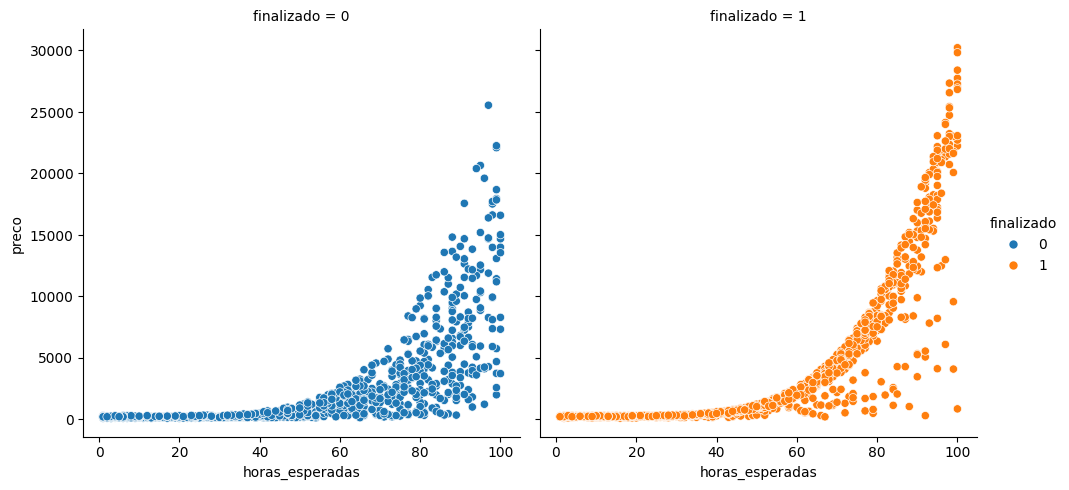

In [8]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, col="finalizado", hue="finalizado")

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [10]:
from sklearn.model_selection import train_test_split

SEED = 5
#np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y
    )

print("Treinaremos com %d elementos e testaremos com %d" %(len(train_x), len(test_x)))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)
acuracia = accuracy_score(test_y, previsoes)

print("A acurácia foi de %.2f%%" % (acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540
A acurácia foi de 54.63%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
import numpy as np

previsoesT = np.ones(540)
acuracia = accuracy_score(test_y, previsoesT)

print("A acurácia foi de %.2f%%" % (acuracia * 100))

A acurácia foi de 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

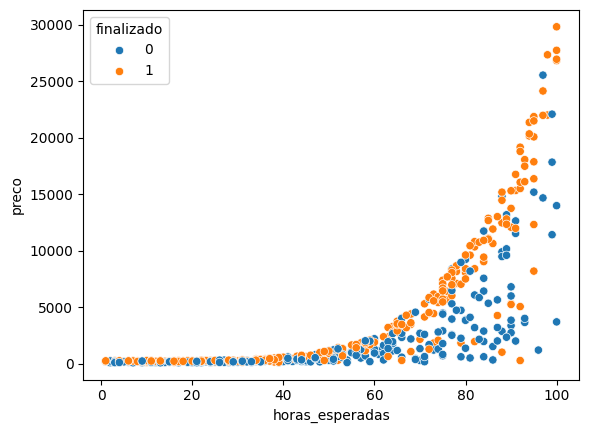

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", data=test_x, hue=test_y)

In [13]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 29820


In [14]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.00000e+00, 1.00000e+02],
       [1.99000e+00, 1.00000e+02],
       [2.98000e+00, 1.00000e+02],
       ...,
       [9.70300e+01, 2.95228e+04],
       [9.80200e+01, 2.95228e+04],
       [9.90100e+01, 2.95228e+04]])

In [16]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

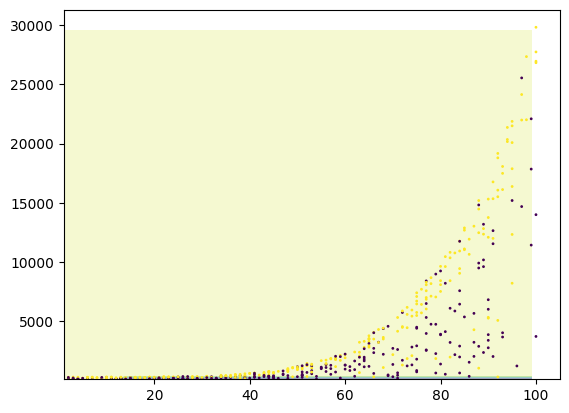

In [17]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(test_x.horas_esperadas, test_x.preco, c = test_y, s=1)

#decision boundary

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
#np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    random_state = SEED,
    test_size = 0.25,
    stratify = y
    )

print("Treinaremos com %d elementos e testaremos com %d" %(len(train_x), len(test_x)))



model = SVC(random_state = SEED)
model.fit(train_x, train_y)
previsoes = model.predict(test_x)
acuracia = accuracy_score(test_y, previsoes)

print("A acurácia foi de %.2f%%" % (acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540
A acurácia foi de 55.19%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


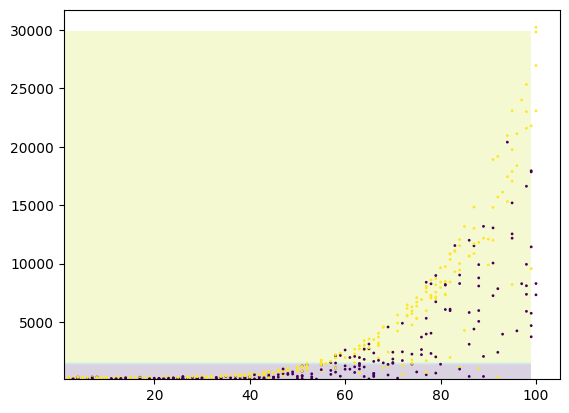

In [19]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(test_x.horas_esperadas, test_x.preco, c = test_y, s=1)

#decision boundary

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
#np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x,
    y,
    random_state = SEED,
    test_size = 0.25,
    stratify = y
    )

print("Treinaremos com %d elementos e testaremos com %d" %(len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)


model = SVC(random_state = SEED)
model.fit(train_x, train_y)
previsoes = model.predict(test_x)
acuracia = accuracy_score(test_y, previsoes)

print("A acurácia foi de %.2f%%" % (acuracia * 100))



Treinaremos com 1617 elementos e testaremos com 540
A acurácia foi de 66.85%


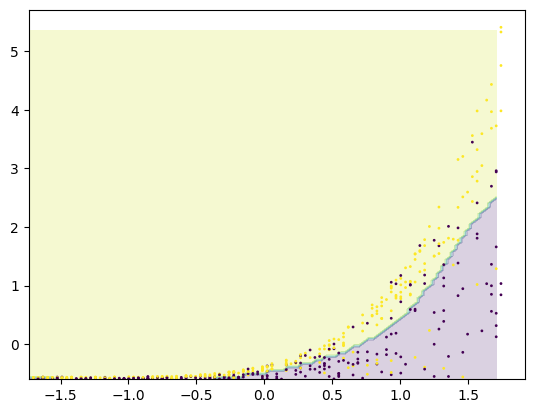

In [25]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(data_x, data_y, c = test_y, s=1)

#decision boundary